<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/Full%20training%20and%20testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing

In [0]:
downloaded.GetContentFile('Dataa_True.csv')

In [6]:
import pandas as pd
df2 = pd.read_csv('Dataa_True.csv') 
df2

,Time,TRUE,Srac,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
1,0.0,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
2,0.1,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
3,0.2,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
4,0.3,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,4999.5,2.367222,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,4999.6,2.366861,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,4999.7,2.366521,2.366521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49999,4999.8,2.366202,2.366202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2["TRUE"] = df2["TRUE"].fillna(0)
df2["Srac"] = df2["Srac"].fillna(0)
df2

,Time,TRUE,Srac,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
1,0.0,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
2,0.1,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
3,0.2,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
4,0.3,20.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.2,0.3,0.4,0.5,0.6,0.9,0.7,0.8,1.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,4999.5,2.367222,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,4999.6,2.366861,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,4999.7,2.366521,2.366521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49999,4999.8,2.366202,2.366202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
t=df2['Time']
Label=df2['TRUE']
y=np.array( Label)
X=df2['Srac']
X=np.array(X)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [10]:
X

array([ 0.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [0]:
scaled_data=X

In [12]:
scaled_data

array([ 0.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [13]:
X

array([ 0.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [14]:
X.shape

(50001,)

In [0]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 3
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [16]:
X

array([[ 0.      , 20.      , 20.      ],
       [20.      , 20.      , 20.      ],
       [20.      , 20.      , 20.      ],
       ...,
       [ 0.1     ,  0.1     ,  0.1     ],
       [ 0.1     ,  0.1     ,  2.366521],
       [ 0.1     ,  2.366521,  2.366202]])

In [17]:
X.shape

(49998, 3)

In [0]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [19]:
X.shape[0]

49998

In [20]:
X.shape[1]

3

In [21]:
n_features

1

In [22]:
X

array([[[ 0.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       ...,

       [[ 0.1     ],
        [ 0.1     ],
        [ 0.1     ]],

       [[ 0.1     ],
        [ 0.1     ],
        [ 2.366521]],

       [[ 0.1     ],
        [ 2.366521],
        [ 2.366202]]])

In [23]:
X.shape

(49998, 3, 1)

In [24]:
z


array([20.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [25]:
z.shape

(49998,)

In [26]:
Label

0         0.000000
1        20.000000
2        20.000000
3        20.000000
4        20.000000
           ...    
49996     2.367222
49997     2.366861
49998     2.366521
49999     2.366202
50000     2.365877
Name: TRUE, Length: 50001, dtype: float64

In [27]:
Label.shape

(50001,)

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [0]:
# define input sequence
raw_seq = Label
# choose a number of time steps
n_steps = 3
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [30]:
Label

array([[[ 0.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       ...,

       [[ 2.367604],
        [ 2.367222],
        [ 2.366861]],

       [[ 2.367222],
        [ 2.366861],
        [ 2.366521]],

       [[ 2.366861],
        [ 2.366521],
        [ 2.366202]]])

In [31]:
Label.shape

(49998, 3, 1)

In [32]:
y

array([20.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [33]:
y.shape

(49998,)

In [34]:
X

array([[[ 0.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       ...,

       [[ 0.1     ],
        [ 0.1     ],
        [ 0.1     ]],

       [[ 0.1     ],
        [ 0.1     ],
        [ 2.366521]],

       [[ 0.1     ],
        [ 2.366521],
        [ 2.366202]]])

In [35]:
y

array([20.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [0]:
X_train  = np.array(X[:45000])
y_train = np.array(y[:45000])

X_test = np.array(X[5000:])
y_test = np.array(y[5000:])

In [39]:

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (45000, 3, 1)
y_train size: (45000,)
X_test size: (44998, 3, 1)
y_test size: (44998,)


In [0]:
dates = df2['Time']
train_date = dates[:45000]
test_date = dates[-44998:]

In [0]:
X = X_train
y = y_train


In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
history=model.fit(X, y, epochs=200, verbose=0)


In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    


In [45]:
print(y_pred)
print(y_test)


[2.4780454635620117, 2.477999687194824, 2.477935791015625, 2.4778642654418945, 2.4777872562408447, 2.4777112007141113, 2.477630376815796, 2.4775400161743164, 2.4774582386016846, 2.477377414703369, 2.477292537689209, 2.4772140979766846, 2.477146625518799, 2.4770777225494385, 2.4770143032073975, 2.476958751678467, 2.4769084453582764, 2.4768662452697754, 2.4768247604370117, 2.476789712905884, 2.4767603874206543, 2.476736545562744, 2.4767162799835205, 2.476699113845825, 2.4766860008239746, 2.476675510406494, 2.4766666889190674, 2.47666072845459, 2.476656436920166, 2.4766526222229004, 2.476649761199951, 2.47664737701416, 2.4766435623168945, 2.4766390323638916, 2.4766340255737305, 2.476625442504883, 2.476616382598877, 2.47660231590271, 2.4765868186950684, 2.4765655994415283, 2.476541757583618, 2.4765117168426514, 2.4764788150787354, 2.476439952850342, 2.4763951301574707, 2.4763431549072266, 2.4762802124023438, 2.4762134552001953, 2.476139783859253, 2.4760658740997314, 2.4759750366210938, 2.4

In [0]:
y_pred

In [47]:
len(y_pred)

44998

In [48]:
y_test

array([2.490917, 2.490862, 2.490804, ..., 2.366521, 2.366202, 2.365877])

In [49]:
len(y_test)

44998

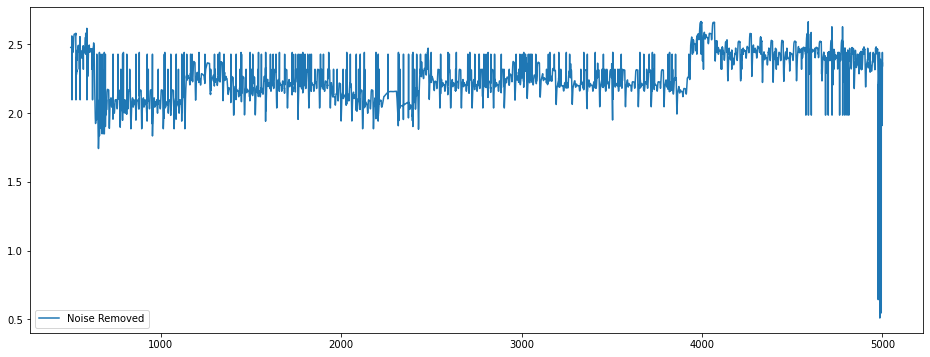

In [50]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [51]:
scaled_data

array([ 0.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [0]:
scaled_data_1=scaled_data[-44998:]

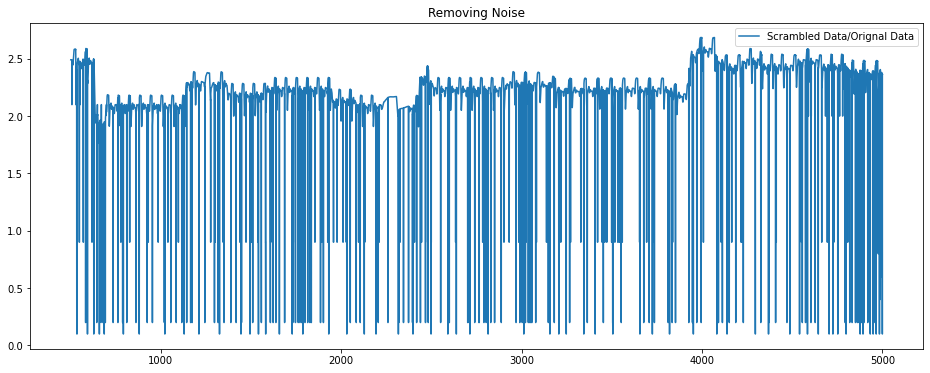

In [54]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
#plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

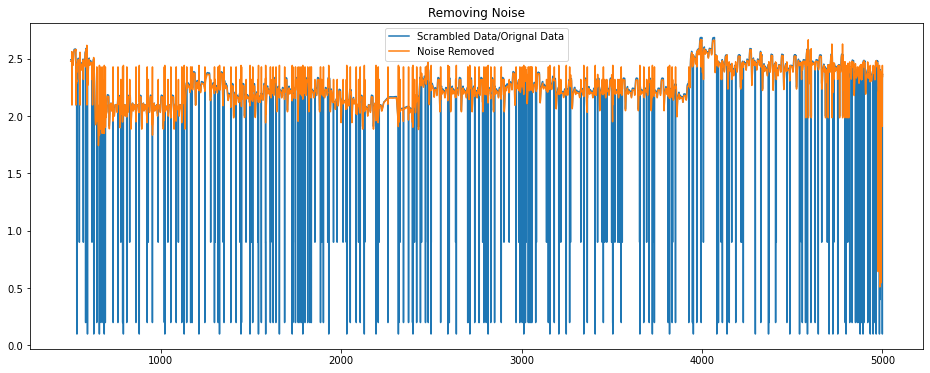

In [55]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

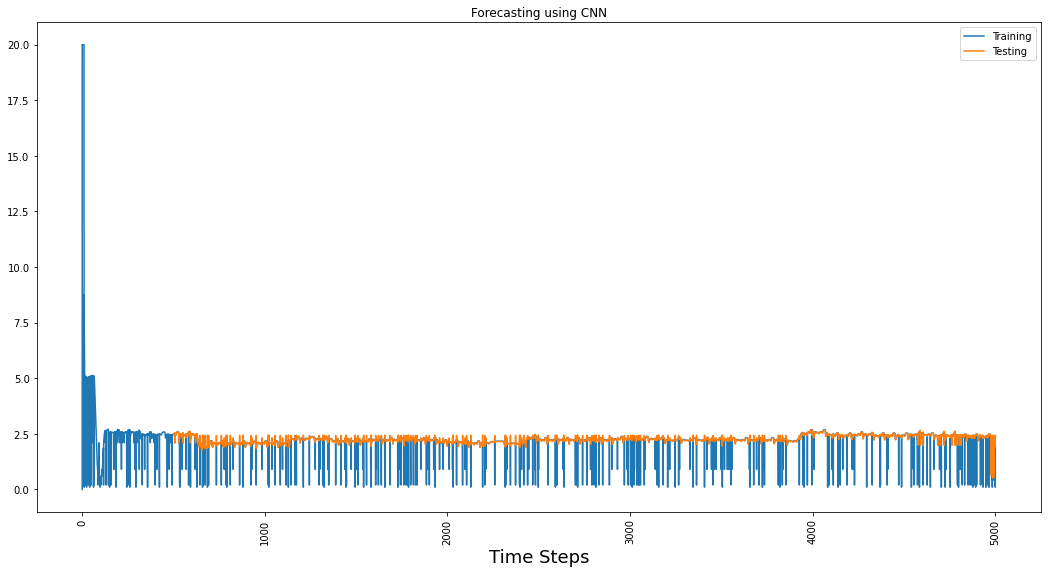

In [56]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

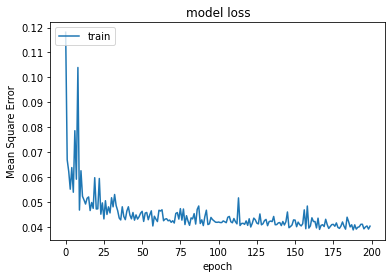

In [57]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()